## Live coding: Callbacks and thresholding

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def imshow(img):
    plt.figure(figsize=(15,15))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

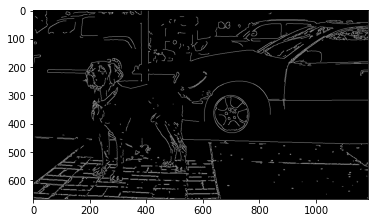

In [2]:
#edge detection
img = cv2.imread('./img/custom.jpg')
canny= cv2.Canny(img,200,300)
plt.imshow(canny,cmap='gray')

In [11]:
img = cv2.imread('./img/custom.jpg')

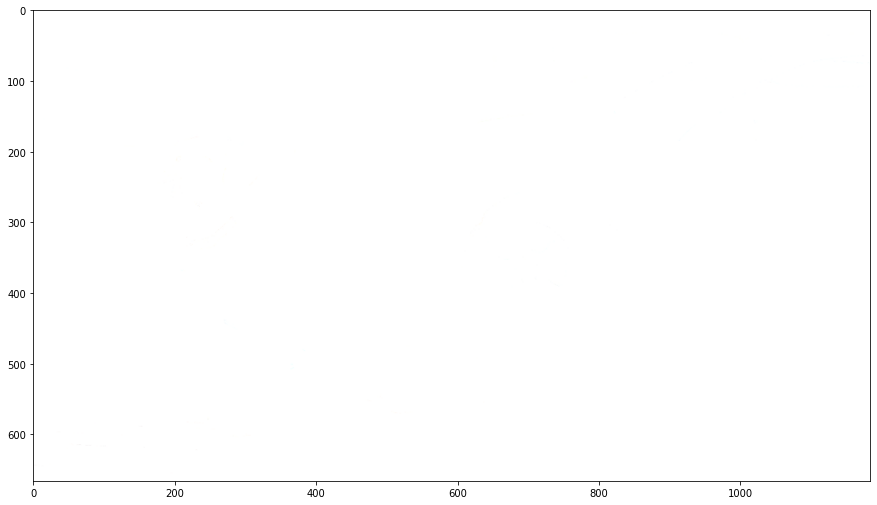

In [12]:
img = cv2.imread('./img/custom.jpg')
pixel_values=np.ones(img.shape,dtype='uint8')*240
bright=cv2.add(img, pixel_values)
imshow(bright)

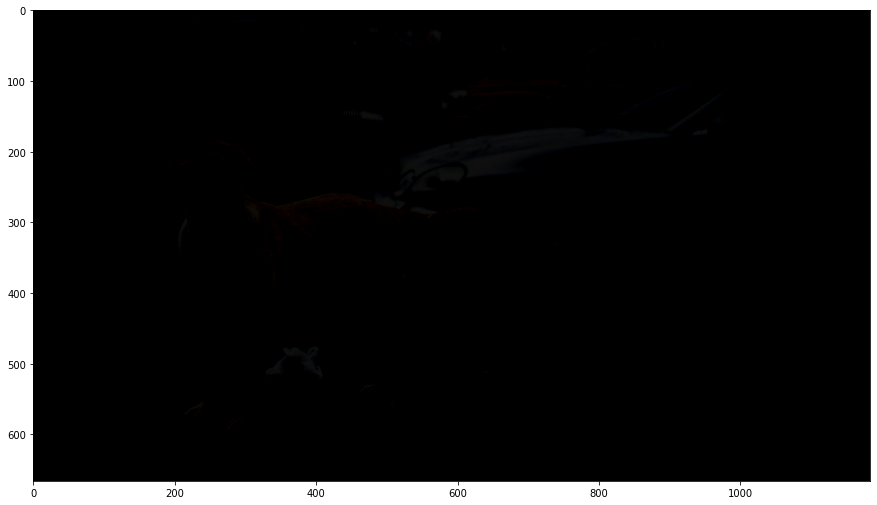

In [6]:
pixel_values=np.ones(img.shape,dtype='uint8')*240
light=cv2.subtract(img, pixel_values)
imshow(light)

In [7]:
#Counters
count=0

cap=cv2.VideoCapture(1)
key=0

img=np.ones(img.shape, dtype='uint8')
while(True):
    ret,frame=cap.read()
    
    if (key == ord('q')):
        break
    
    if (key == ord('i') or key == ord('I')):
        count = count + 1
        img = frame.copy()
        cv2.putText(img, f'(Count + 1 = {count}',(200,200),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),3)
    
    if (key == ord('d') or key == ord('D')):
        count = count - 1
        img = frame.copy()
        cv2.putText(img, f'(Count - 1 = {count}',(200,200),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),3)
    
    cv2.imshow('Image', img)
    
    key=cv2.waitKey(1)
    
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [13]:
img = cv2.imread('./img/custom.jpg')

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thres_img = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

In [15]:
ret

True

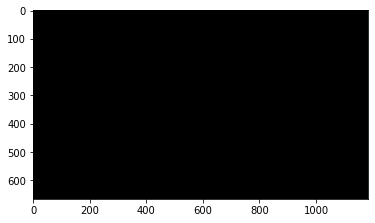

In [10]:
plt.imshow(thres_img, cmap='gray')

In [20]:
# Trackbars
threshold_value =128
threshold_type = cv2.THRESH_BINARY

threshold_types = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV,
                  cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV,
                  cv2.THRESH_TRUNC]

window_name='threshold'


img=img.copy()

gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)

def change_threshold_value(val):
    threshold_value=val
    ret, thresh = cv2.threshold(gray_img,threshold_value,
                                255,threshold_type)
    
    cv2.imshow(window_name, thresh)
    
def change_threshold_type(val):
    threshold_type=threshold_types[val]
    ret, thresh = cv2.threshold(gray_img,threshold_value,
                                255,threshold_type)
                              
    cv2.imshow(window_name, thresh)    
    
    
cv2.createTrackbar('Threshold Value', window_name,
                  threshold_value,255, change_threshold_value)

    
cv2.createTrackbar('Threshold Type', window_name,
                  threshold_type,4, change_threshold_type)

#print('cre')
cv2.imshow(window_name, gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)



-1

In [18]:
#mouse callbacks
window_name = 'mouse callbacks'

img=img.copy()
cv2.namedWindow(window_name)

def draw_square(action, x,y, flags, userdata):
    if (action == cv2.EVENT_LBUTTONUP):
        cv2.rectangle(userdata,(x,y),(x+50, y+50),(0,255,0),-1)
        cv2.imshow(window_name,userdata)
        
    if (action == cv2.EVENT_RBUTTONUP):
        cv2.rectangle(userdata,(x,y),(x+50, y+50),(255,0,0),-1)
        cv2.imshow(window_name,userdata)
        
cv2.setMouseCallback(window_name, draw_square, img)
cv2.imshow(window_name, img)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

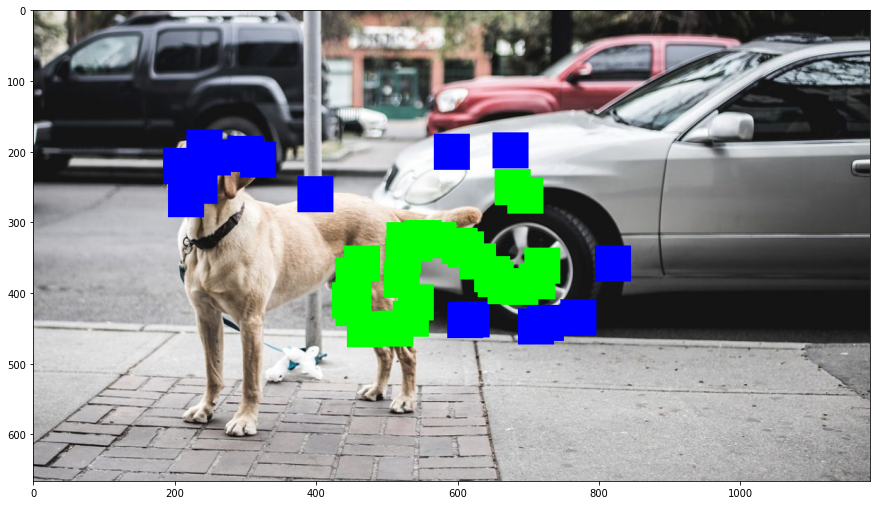

In [19]:
imshow(img)